In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from keras.optimizers import SGD
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

Using TensorFlow backend.


In [2]:
data = []
labels = []


dims=(32,32)

imgp="c:/data/cells/"


forced_numimg=10000

image_path=imgp+"healthy/"
p=os.listdir(image_path)
num_img=len(p)

if forced_numimg>0:
    num_img=forced_numimg
for i in range(num_img):
    current_path=image_path+p[i]
    #print(current_path)
    image = cv2.imread(image_path+p[i])
    image = cv2.resize(image,dims)
    data.append(image)
    labels.append('healthy')

print('Loaded Healthy cell data')

if forced_numimg>0:
    num_img=forced_numimg
image_path=imgp+"infected/"
p=os.listdir(image_path)    
for i in range(num_img):
    current_path=image_path+p[i]
    #print(current_path)
    image = cv2.imread(image_path+p[i])
    image = cv2.resize(image,dims)
    data.append(image)
    labels.append('infected')
    
print('Loaded Infected cell data')


Loaded Healthy cell data
Loaded Infected cell data


In [3]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)

(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=7)

model = Sequential()



chanDim=-1

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
#model.add(Conv2D(64, (3, 3), padding="same"))
#model.add(Activation("relu"))
#model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
#model.add(Dropout(0.25))


model.add(Flatten())




model.add(Dense(1024, activation="sigmoid"))
model.add(Dense(512, activation="sigmoid"))
model.add(Dense(256, activation="sigmoid"))
model.add(Dense(1, activation="sigmoid"))

In [9]:
INIT_LR = 0.05
EPOCHS = 10
# compile the model using SGD as our optimizer and categorical
# cross-entropy loss (you'll want to use binary_crossentropy
# for 2-class classification)
print("[INFO] training network...")
opt = SGD(lr=INIT_LR)
model.compile(loss="binary_crossentropy", optimizer='adam',
	metrics=["accuracy"])

H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=EPOCHS, batch_size=32)


# evaluate the network
print("[INFO] evaluating network...")
pred = model.predict(testX, batch_size=32)

for i in range(len(pred)):
    if pred[i]>0.5:
        pred[i]=1
    else:
        pred[i]=0

cm=confusion_matrix(testY,pred)

[INFO] training network...
Train on 15000 samples, validate on 5000 samples
Epoch 1/10
15000/15000 [==============================] - 288s 19ms/step - loss: 0.4672 - acc: 0.7833 - val_loss: 0.4892 - val_acc: 0.7740
Epoch 2/10
15000/15000 [==============================] - 296s 20ms/step - loss: 0.4083 - acc: 0.8144 - val_loss: 0.3751 - val_acc: 0.8276
Epoch 3/10
15000/15000 [==============================] - 284s 19ms/step - loss: 0.3188 - acc: 0.8659 - val_loss: 0.4741 - val_acc: 0.7902
Epoch 4/10
15000/15000 [==============================] - 285s 19ms/step - loss: 0.2841 - acc: 0.8819 - val_loss: 0.8411 - val_acc: 0.6552
Epoch 5/10
15000/15000 [==============================] - 281s 19ms/step - loss: 0.2226 - acc: 0.9107 - val_loss: 0.4501 - val_acc: 0.8366
Epoch 6/10
15000/15000 [==============================] - 274s 18ms/step - loss: 0.1766 - acc: 0.9329 - val_loss: 0.4732 - val_acc: 0.8400
Epoch 7/10
15000/15000 [==============================] - 266s 18ms/step - loss: 0.1432 - 

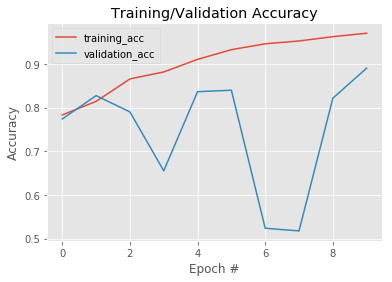

In [14]:
pred = model.predict(testX, batch_size=32)

for i in range(len(pred)):
    if pred[i]>0.5:
        pred[i]=1
    else:
        pred[i]=0

cm=confusion_matrix(testY,pred)
#print(classification_report(testY,predictions))
 
# plot the training loss and accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
#plt.plot(N, H.history["loss"], label="train_loss")
#plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["acc"], label="training_acc")
plt.plot(N, H.history["val_acc"], label="validation_acc")
plt.title("Training/Validation Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()


In [15]:
plt.savefig('accuracy.png')

<Figure size 432x288 with 0 Axes>

In [23]:
predprob=model.predict(testX, batch_size=32)


Text(0, 0.5, 'True Positive Rate')

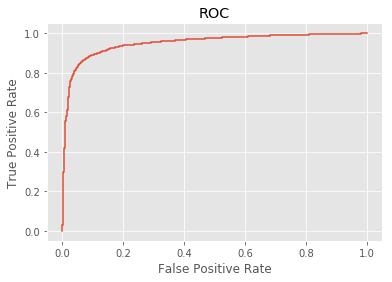

In [26]:
fpr, tpr, t =roc_curve(testY,predprob)
plt.plot(fpr, tpr)
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [27]:
cm

array([[2295,  130],
       [ 417, 2158]], dtype=int64)

In [29]:
print(classification_report(testY,pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.89      2425
           1       0.94      0.84      0.89      2575

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.90      0.89      0.89      5000

